In [1]:
import numpy as np
import matplotlib.pyplot as pp
import seaborn

In [2]:
%matplotlib inline

In [3]:
import urllib.request

In [4]:
#urllib.request.urlretrieve('ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/daily/ghcnd-stations.txt','stations.txt')

help(str.join)

Help on method_descriptor:

join(...)
    S.join(iterable) -> str
    
    Return a string which is the concatenation of the strings in the
    iterable.  The separator between elements is S.



In [5]:
stations = {}
afield=[]
for line in open('stations.txt','r'):
    if 'GSN' in line:
        fields = line.split()
        stations[fields[0]]=' '.join(fields[4:])
        afield= fields

afield

['ZI000067983', '-20.2000', '32.6160', '1132.0', 'CHIPINGE', 'GSN', '67983']

In [6]:
stations

{'AE000041196': 'SHARJAH INTER. AIRP GSN 41196',
 'AF000040930': 'NORTH-SALANG GSN 40930',
 'AG000060390': 'ALGER-DAR EL BEIDA GSN 60390',
 'AG000060590': 'EL-GOLEA GSN 60590',
 'AG000060611': 'IN-AMENAS GSN 60611',
 'AG000060680': 'TAMANRASSET GSN 60680',
 'AJ000037989': 'ASTARA GSN 37989',
 'ALM00013615': 'TIRANA RINAS GSN 13615',
 'AM000037781': 'ARAGAC VISOKOGORNAYA GSN 37781',
 'AO000066160': 'LUANDA GSN 66160',
 'AO000066270': 'WAKU KUNGU (CELA) GSN 66270',
 'AO000066390': 'LUBANGO (SA DA BAND GSN 66390',
 'AO000066410': 'MENONGUE (SERPA PIN GSN 66410',
 'AO000066422': 'MOCAMEDES GSN 66422',
 'AO000066447': 'MAVINGA GSN 66447',
 'AQW00061705': 'AS PAGO PAGO WSO AP GSN 91765',
 'AR000087007': 'LA QUIACA OBSERVATO GSN 87007',
 'AR000087065': 'RIVADAVIA GSN 87065',
 'AR000087078': 'LAS LOMITAS GSN 87078',
 'AR000087155': 'RESISTENCIA AERO GSN 87155',
 'AR000087217': 'LA RIOJA AERO. GSN 87217',
 'AR000087257': 'CERES AERO GSN 87257',
 'AR000087270': 'RECONQUISTA AERO GSN 87270',
 'AR

In [7]:
stations = {}
for line in open('stations.txt','r'):
    if 'GSN' in line:
        fields = line.split()
        stations[fields[0]]=' '.join(fields[4:])

In [8]:
len(stations)


994

In [9]:
def findstation(s):
    found = {code:name for code,name in stations.items() if s in name}
    print(found)

In [10]:
findstation('LIHUE')

{'USW00022536': 'HI LIHUE WSO AP 1020.1 GSN 91165'}


In [11]:
findstation('SAN DIEGO')

{'USW00023188': 'CA SAN DIEGO LINDBERGH FLD GSN 72290'}


In [12]:
findstation('MINNEAPOLIS')

{'USW00014922': 'MN MINNEAPOLIS/ST PAUL AP GSN HCN 72658'}


In [13]:
findstation('IRKUTSK')

{'RSM00030710': 'IRKUTSK GSN 30710'}


In [14]:
datastations = ['USW00022536','USW00023188','USW00014922','RSM00030710']

In [15]:
#/Users/f2m/Desktop/DataScience_1/Weather-Data-Analysis-with-Python-master/Weather Dataset

In [16]:
open('Weather Dataset/USW00022536.dly','r').readlines()[:1]

['USW00022536195002TMAX  256  0  256  0  256  0  267  0  217  0  228  0  256  0  272  0  256  0  256  0  256  0  244  0  256  0  256  0  244  0  244  0  250  0  256  0  239  0  250  0  256  0  256  0  267  0  261  0  267  0  267  0  261  0  261  0-9999   -9999   -9999   \n']

In [17]:
open('Weather Dataset/RSM00030710.dly','r').readlines()[:1]

['RSM00030710188201PRCP    0  r   51  r    0  r    0  r    0  r    0  r   21  r  158  r    0  r    0  r    0  r    0  r    0  r    0  r    0  r    0  r  253  r    0  r    0  r    0  r    0  r    0  r    0  r    0  r    0  r    0  r    0  r    0  r    0  r    0  r    0  r\n']

In [18]:
open('Weather Dataset/USW00022536.dly','r').readlines()[:1]

['USW00022536195002TMAX  256  0  256  0  256  0  267  0  217  0  228  0  256  0  272  0  256  0  256  0  256  0  244  0  256  0  256  0  244  0  244  0  250  0  256  0  239  0  250  0  256  0  256  0  267  0  261  0  267  0  267  0  261  0  261  0-9999   -9999   -9999   \n']

In [20]:
open('Weather Dataset/readme.txt','r').readlines()[:1]

['README FILE FOR DAILY GLOBAL HISTORICAL CLIMATOLOGY NETWORK (GHCN-DAILY) \n']

In [21]:
def parsefile(filename):
    return np.genfromtxt(filename,
                        delimiter = dly_delimiter,
                        usecols = dly_usecols,
                        dtype = dly_dtype,
                        names = dly_names)

In [22]:
dly_delimiter=[11,4,2,4]+[5,1,1,1]*31
dly_usecols=[1,2,3]+[4*i for i in range(1,32)]
dly_dtype=[np.int32,np.int32,(np.str_,4)]+[np.int32]*31
dly_names=['year','month','obs']+[str(day) for day in range(1,31+1)]

In [23]:
lihue = parsefile('Weather Dataset/USW00014922.dly')

In [24]:
lihue[88:122]

array([ (1939, 9, 'SNOW', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -9999),
       (1939, 9, 'SNWD', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -9999),
       (1939, 10, 'TMAX', 250, 233, 250, 183, 167, 244, 211, 178, 128, 167, 133, 100, 44, 72, 189, 72, 83, 178, 200, 178, 172, 117, 72, 128, 117, 83, 44, 61, 78, 28, 94),
       (1939, 10, 'TMIN', 56, 100, 100, 67, 83, 44, 111, 83, 72, 39, 39, 17, 0, -39, 22, -11, -44, 39, 39, 72, 78, 17, 28, 22, 72, 44, -17, -50, 17, -17, -6),
       (1939, 10, 'PRCP', 0, 3, 3, 152, 0, 0, 0, 0, 163, 0, 3, 5, 20, 0, 0, 0, 0, 0, 0, 0, 0, 3, 5, 0, 0, 5, 3, 0, 8, 25, 0),
       (1939, 10, 'SNOW', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 15, 0),
       (1939, 10, 'SNWD', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0),
       (1939, 11, 'TMAX', 6, 33, 67, 94, 106, 106, 83, 7

In [25]:
def unroll(record):
    startdate=np.datetime64('{}-{:02}'.format(record['year'],record['month']))
    dates=np.arange(startdate,startdate+np.timedelta64(1,'M'),np.timedelta64(1,'D'))
    rows=[(date,record[str(i+1)]/10) for i,date in enumerate(dates)]
    return rows

In [26]:
unroll(lihue[70])

[(numpy.datetime64('1939-06-01'), 33.299999999999997),
 (numpy.datetime64('1939-06-02'), 29.399999999999999),
 (numpy.datetime64('1939-06-03'), 21.699999999999999),
 (numpy.datetime64('1939-06-04'), 28.300000000000001),
 (numpy.datetime64('1939-06-05'), 31.699999999999999),
 (numpy.datetime64('1939-06-06'), 29.399999999999999),
 (numpy.datetime64('1939-06-07'), 25.600000000000001),
 (numpy.datetime64('1939-06-08'), 28.899999999999999),
 (numpy.datetime64('1939-06-09'), 26.100000000000001),
 (numpy.datetime64('1939-06-10'), 18.300000000000001),
 (numpy.datetime64('1939-06-11'), 16.699999999999999),
 (numpy.datetime64('1939-06-12'), 22.199999999999999),
 (numpy.datetime64('1939-06-13'), 20.600000000000001),
 (numpy.datetime64('1939-06-14'), 19.399999999999999),
 (numpy.datetime64('1939-06-15'), 23.300000000000001),
 (numpy.datetime64('1939-06-16'), 28.899999999999999),
 (numpy.datetime64('1939-06-17'), 21.699999999999999),
 (numpy.datetime64('1939-06-18'), 31.100000000000001),
 (numpy.da

In [27]:
def unroll(record):
    startdate = np.datetime64('{}-{:02}'.format(record['year'],record['month']))
    dates = np.arange(startdate,startdate + np.timedelta64(1,'M'),np.timedelta64(1,'D'))
    
    rows = [(date,record[str(i+1)]/10) for i,date in enumerate(dates)]
    
    return np.array(rows,dtype=[('date','M8[D]'),('value','d')])

In [28]:
unroll(lihue[0])

array([(datetime.date(1938, 4, 1), -999.9),
       (datetime.date(1938, 4, 2), -999.9),
       (datetime.date(1938, 4, 3), -999.9),
       (datetime.date(1938, 4, 4), -999.9),
       (datetime.date(1938, 4, 5), -999.9),
       (datetime.date(1938, 4, 6), -999.9),
       (datetime.date(1938, 4, 7), -999.9),
       (datetime.date(1938, 4, 8), -999.9),
       (datetime.date(1938, 4, 9), 10.6),
       (datetime.date(1938, 4, 10), 18.9),
       (datetime.date(1938, 4, 11), 17.2),
       (datetime.date(1938, 4, 12), 21.7),
       (datetime.date(1938, 4, 13), 25.6),
       (datetime.date(1938, 4, 14), 19.4),
       (datetime.date(1938, 4, 15), 11.7),
       (datetime.date(1938, 4, 16), 13.3),
       (datetime.date(1938, 4, 17), 22.8),
       (datetime.date(1938, 4, 18), 21.7),
       (datetime.date(1938, 4, 19), 17.2),
       (datetime.date(1938, 4, 20), 14.4),
       (datetime.date(1938, 4, 21), 8.9),
       (datetime.date(1938, 4, 22), 14.4),
       (datetime.date(1938, 4, 23), 9.4),
      

In [29]:
def getobs(filename,obs):
    return np.concatenate([unroll(row) for row in parsefile(filename) if row[2] == obs])

In [30]:
getobs('Weather Dataset/USW00022536.dly','TMIN')

array([(datetime.date(1950, 2, 1), 17.8),
       (datetime.date(1950, 2, 2), 15.6),
       (datetime.date(1950, 2, 3), 16.1), ...,
       (datetime.date(2015, 9, 28), -999.9),
       (datetime.date(2015, 9, 29), -999.9),
       (datetime.date(2015, 9, 30), -999.9)], 
      dtype=[('date', '<M8[D]'), ('value', '<f8')])

In [31]:
getobs('Weather Dataset/USW00022536.dly','TMIN')

array([(datetime.date(1950, 2, 1), 17.8),
       (datetime.date(1950, 2, 2), 15.6),
       (datetime.date(1950, 2, 3), 16.1), ...,
       (datetime.date(2015, 9, 28), -999.9),
       (datetime.date(2015, 9, 29), -999.9),
       (datetime.date(2015, 9, 30), -999.9)], 
      dtype=[('date', '<M8[D]'), ('value', '<f8')])

In [32]:
lihue_tmax = getobs('Weather Dataset/USW00022536.dly','TMAX')
lihue_tmin = getobs('Weather Dataset/USW00022536.dly','TMIN')

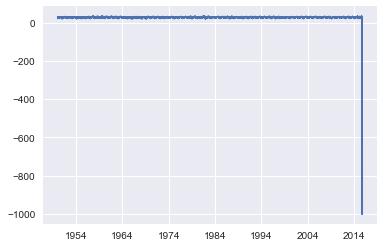

In [33]:
pp.plot(lihue_tmax['date'],lihue_tmax['value'])

In [34]:
def getobs(filename,obs):
    data = np.concatenate([unroll(row) for row in parsefile(filename) if row[2] == obs])
    
    data['value'][data['value'] == -999.9] = np.nan
    
    return data

In [35]:
lihue_tmax = getobs('Weather Dataset/USW00022536.dly','TMAX')
lihue_tmin = getobs('Weather Dataset/USW00022536.dly','TMIN')

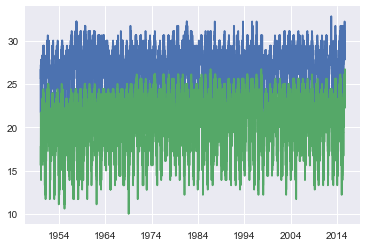

In [36]:
pp.plot(lihue_tmax['date'],lihue_tmax['value'])
pp.plot(lihue_tmin['date'],lihue_tmin['value'])

In [37]:
def fillnans(data):
    dates_float = data['date'].astype(np.float64)
    nan = np.isnan(data['value'])
    data['value'][nan] = np.interp(dates_float[nan],dates_float[-nan],data['value'][-nan])

In [38]:
fillnans(lihue_tmax)
fillnans(lihue_tmin)

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: DeprecationWarning: numpy boolean negative, the `-` operator, is deprecated, use the `~` operator or the logical_not function instead.


In [39]:
np.mean(lihue_tmin['value']) , np.mean(lihue_tmax['value'])

(21.051530250594173, 27.300908977192176)

In [40]:
def plot_smoothed(t,win=10):
    smoothed = np.correlate(t['value'],np.ones(win)/win,'same')
    pp.plot(t['date'],smoothed)

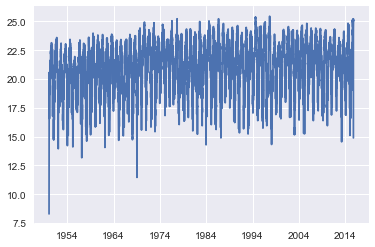

In [41]:
plot_smoothed(lihue_tmin)

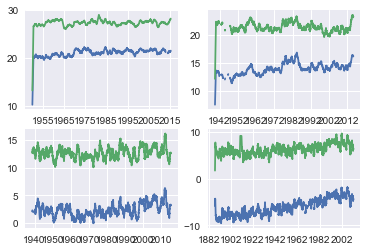

In [42]:
for i,code in enumerate(datastations):
    pp.subplot(2,2,i+1)
    plot_smoothed(getobs('Weather Dataset/{}.dly'.format(code),'TMIN'),365)
    plot_smoothed(getobs('Weather Dataset/{}.dly'.format(code),'TMAX'),365)

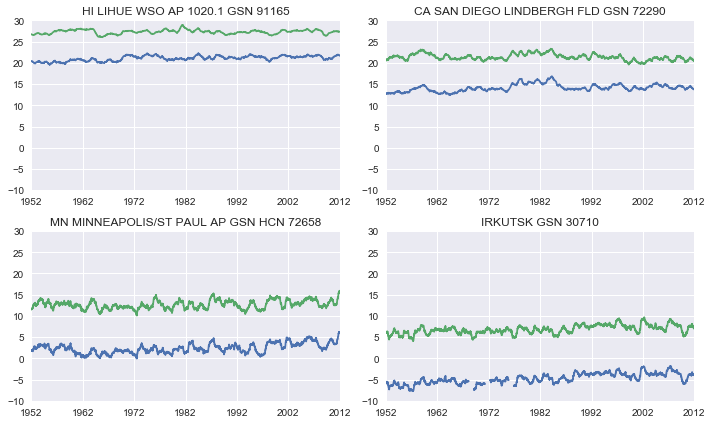

In [43]:
pp.figure(figsize=(10,6))
for i,code in enumerate(datastations):
    pp.subplot(2,2,i+1)
    plot_smoothed(getobs('Weather Dataset/{}.dly'.format(code),'TMIN'),365)
    plot_smoothed(getobs('Weather Dataset/{}.dly'.format(code),'TMAX'),365)
    pp.title(stations[code])
    pp.axis(xmin=np.datetime64('1952'),xmax=np.datetime64('2012'),ymin=-10,ymax=30)
pp.tight_layout()

In [44]:
def selectyear(data,year):
    start = np.datetime64('{}'.format(year))
    end = start + np.timedelta64(1,'Y')
    return data[(data['date']>=start)&(data['date']<end)]['value']

In [45]:
selectyear(lihue_tmin,1951)

array([ 17.8,  17.8,  17.2,  18.3,  20. ,  21.7,  22.2,  21.7,  22.2,
        22.2,  21.7,  21.7,  19.4,  18.9,  18.3,  18.3,  19.4,  20.6,
        16.7,  14.4,  14.4,  17.2,  15. ,  12.8,  14.4,  13.3,  15. ,
        14.4,  17.8,  18.3,  16.7,  16.7,  17.2,  16.7,  17.8,  14.4,
        12.2,  13.3,  13.9,  12.8,  14.4,  14.4,  18.9,  19.4,  20. ,
        18.3,  18.3,  18.9,  20. ,  18.3,  19.4,  13.3,  11.7,  17.8,
        17.2,  17.8,  21.1,  22.2,  20.6,  22.2,  19.4,  20. ,  18.3,
        17.8,  17.8,  17.2,  16.1,  18.9,  18.9,  18.9,  17.8,  16.7,
        15.6,  13.3,  13.9,  15.6,  15.6,  21.7,  20.6,  18.3,  15.6,
        14.4,  17.2,  17.8,  18.9,  20. ,  18.9,  18.3,  18.3,  20.6,
        20. ,  18.9,  18.3,  21.1,  16.7,  21.7,  21.1,  21.7,  17.2,
        16.7,  17.8,  18.3,  16.1,  19.4,  20.6,  18.3,  18.3,  17.2,
        18.9,  21.7,  21.7,  21.7,  21.1,  20.6,  20.6,  20. ,  21.7,
        20. ,  20. ,  19.4,  18.3,  21.7,  22.2,  22.8,  20. ,  19.4,
        17.2,  22.2,

In [46]:
lihue_tmin_all = np.vstack([selectyear(lihue_tmin,year)[:365] for year in range(1951,2014+1)])

In [47]:
lihue_tmin_all

array([[ 17.8,  17.8,  17.2, ...,  20.6,  19.4,  18.9],
       [ 17.2,  19.4,  21.7, ...,  21.7,  20.6,  17.8],
       [ 17.8,  18.3,  19.4, ...,  13.3,  15. ,  15. ],
       ..., 
       [ 17.8,  17.2,  17.8, ...,  18.3,  18.9,  19.4],
       [ 20. ,  20. ,  19.4, ...,  19.4,  20. ,  18.3],
       [ 17.8,  20. ,  17.8, ...,  18.9,  16.1,  14.4]])

In [48]:
lihue_tmin_all.shape

(64, 365)

In [49]:
lihue_tmin_recordmin=np.min(lihue_tmin_all,axis=0)
lihue_tmin_recordmax=np.max(lihue_tmin_all,axis=0)

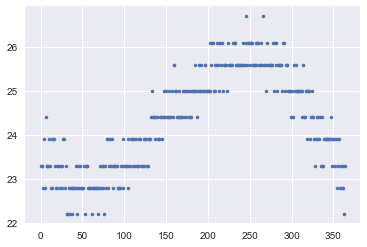

In [50]:
pp.plot(lihue_tmin_recordmax,'.')

In [51]:
lihue_tmax_all = np.vstack([selectyear(lihue_tmax,year)[:365] for year in range (1951,2014+1)])

(-18.25, 365, 8.8599999999999994, 33.939999999999998)

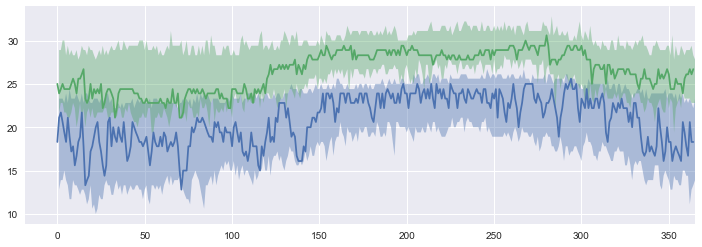

In [52]:
pp.figure(figsize=(12,4))
days=np.arange(1,365+1)
pp.fill_between(days,np.min(lihue_tmin_all,axis=0),np.max(lihue_tmin_all,axis=0),alpha=0.4)
pp.plot(selectyear(lihue_tmin,2009))
pp.fill_between(days,np.min(lihue_tmax_all,axis=0),np.max(lihue_tmax_all,axis=0),alpha=0.4)
pp.plot(selectyear(lihue_tmax,2009))
pp.axis(xmax=365)

In [53]:
findstation('MINNEAPOLIS')

{'USW00014922': 'MN MINNEAPOLIS/ST PAUL AP GSN HCN 72658'}


In [54]:
findstation('SAN DIEGO')

{'USW00023188': 'CA SAN DIEGO LINDBERGH FLD GSN 72290'}


In [55]:
minneapolis_tmax = getobs('Weather Dataset/USW00014922.dly','TMAX')
minneapolis_tmin = getobs('Weather Dataset/USW00014922.dly','TMIN')
sandiego_tmin = getobs('Weather Dataset/USW00023188.dly','TMIN')
sandiego_tmax = getobs('Weather Dataset/USW00023188.dly','TMAX')

In [56]:
fillnans(minneapolis_tmax)
fillnans(minneapolis_tmin)
fillnans(sandiego_tmax)
fillnans(sandiego_tmin)

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: DeprecationWarning: numpy boolean negative, the `-` operator, is deprecated, use the `~` operator or the logical_not function instead.


In [57]:
np.mean(minneapolis_tmax['value'])

12.74308121666019

In [58]:
years = np.arange(1940,2014+1)
minneapolis_tmax_all = np.vstack([selectyear(minneapolis_tmax,year)[:365] for year in years])
minneapolis_tmin_all = np.vstack([selectyear(minneapolis_tmin,year)[:365] for year in years])
sandiego_tmax_all = np.vstack([selectyear(sandiego_tmax,year)[:365] for year in years])
sandiego_tmin_all = np.vstack([selectyear(sandiego_tmin,year)[:365] for year in years])

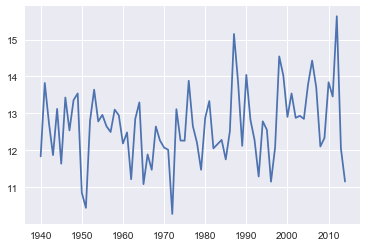

In [59]:
minneapolis_mean = np.mean(minneapolis_tmax_all,axis=1)
pp.plot(years,minneapolis_mean)

In [60]:
minneapolis_warmest = years[np.argmax(minneapolis_mean)]
minneapolis_warmest

2012

In [61]:
sandiego_mean = np.mean(sandiego_tmin_all,axis=1)
sandiego_coldest = years[np.argmin(sandiego_mean)]
sandiego_coldest

1948

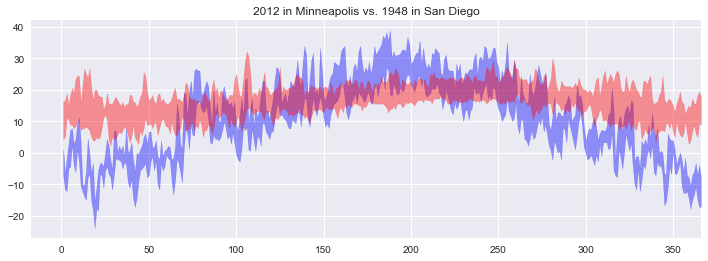

In [62]:
pp.figure(figsize=(12,4))

days = np.arange(1,366+1)

pp.fill_between(days,
                selectyear(minneapolis_tmin,minneapolis_warmest),
                selectyear(minneapolis_tmax,minneapolis_warmest),
                color='b',alpha=0.4)

pp.fill_between(days,
                selectyear(sandiego_tmin,sandiego_coldest),
                selectyear(sandiego_tmax,sandiego_coldest),
                color='r',alpha=0.4)

pp.axis(xmax=366)

pp.title('{} in Minneapolis vs. {} in San Diego'.format(minneapolis_warmest,sandiego_coldest))